In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

%matplotlib inline

# We'll define a function to draw a nice plot of an SVM
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    Z = svc.decision_function(xy).reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3, levels=[-1, 0, 1],
           linestyles=['--', '-', '--'])
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker ='*',  s=70, linewidths= 1, facecolors='none', edgecolors='k')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

# Support Vector Machines

In this lab, we'll use the ${\tt SVC}$ module from the ${\tt sklearn.svm}$ package to demonstrate the support vector classifier
and the SVM:

In [6]:
from sklearn.svm import SVC

# Support Vector Classifier

The ${\tt SVC()}$ function can be used to fit a
support vector classifier when the argument ${\tt kernel="linear"}$ is used. The ${\tt c}$ argument allows us to specify the cost of
a violation to the margin. When the ${\tt c}$ argument is **small**, then the margins
will be wide and many support vectors will be on the margin or will
violate the margin. When the ${\tt c}$ argument is **large**, then the margins will
be narrow and there will be few support vectors on the margin or violating
the margin.

We can use the ${\tt SVC()}$ function to fit the support vector classifier for a
given value of the ${\tt cost}$ parameter. Here we demonstrate the use of this
function on a two-dimensional example so that we can plot the resulting
decision boundary. Let's start by generating a set of observations, which belong
to two classes:

In [3]:
# Generating random data: 20 observations of 2 features and divide into two classes.
np.random.seed(2)
X = np.random.randn(20,2)
y = np.repeat([1,-1], 10)

X[y == -1] = X[y == -1] +1

Let's plot the data to see whether the classes are linearly separable:

Text(0, 0.5, 'X2')

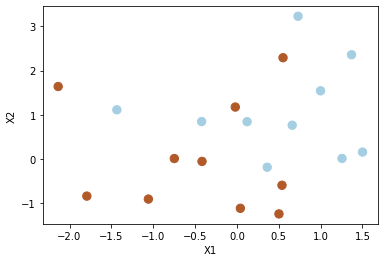

In [6]:
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap = mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

Nope; not linear. Next, we fit the support vector classifier:

In [7]:
svc = SVC(C=1, kernel = 'linear')
svc.fit(X,y)

SVC(C=1, kernel='linear')

We can now plot the support vector classifier by calling the ${\tt plot\_svc()}$ function on the output of the call to ${\tt SVC()}$, as well as the data used in the call to ${\tt SVC()}$:

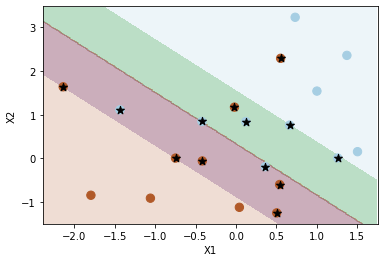

Number of support vectors:  13


In [8]:
plot_svc(svc, X, y)

The region of feature space that will be assigned to the −1 class is shown in
light blue, and the region that will be assigned to the +1 class is shown in
brown. The decision boundary between the two classes is linear (because we
used the argument ${\tt kernel="linear"}$).

The support vectors are plotted with stars
and the remaining observations are plotted as circles; we see here that there
are 13 support vectors. We can determine their identities as follows:

In [9]:
svc.support_

array([10, 11, 12, 13, 14, 16,  0,  1,  3,  5,  7,  8,  9], dtype=int32)

In [10]:
svc.support_vectors_

array([[ 0.12189211,  0.84356583],
       [ 1.25657045,  0.01122095],
       [ 0.66117803,  0.76381597],
       [ 0.36234499, -0.18761229],
       [-0.42121723,  0.8465048 ],
       [-1.43476758,  1.1127265 ],
       [-0.41675785, -0.05626683],
       [-2.1361961 ,  1.64027081],
       [ 0.50288142, -1.24528809],
       [ 0.55145404,  2.29220801],
       [ 0.53905832, -0.5961597 ],
       [-0.0191305 ,  1.17500122],
       [-0.74787095,  0.00902525]])

What if we instead used a smaller value of the ${\tt cost}$ parameter? Like 0.1.

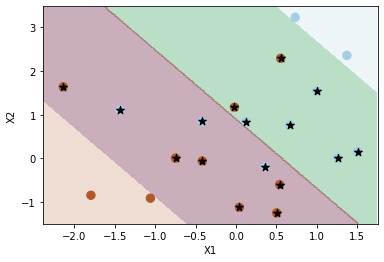

Number of support vectors:  16


In [12]:
svc2 = SVC(C=0.1, kernel = 'linear')
svc2.fit(X,y)
plot_svc(svc2, X, y)

Now that a smaller value of the ${\tt c}$ parameter is being used, we obtain a
larger number of support vectors, because the margin is now **wider**.

The ${\tt sklearn.grid\_search}$ module includes a a function ${\tt GridSearchCV()}$ to perform cross-validation. In order to use this function, we pass in relevant information about the set of models that are under consideration. The
following command indicates that we want perform 10-fold cross-validation to compare SVMs with a linear
kernel, using a range of values of the cost parameter:

In [15]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'C':[0.001, 0.01, 0.1, 1, 5, 10, 100]}]

clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy')

We can easily access the cross-validation errors for each of these models:

In [16]:
clf.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}],
             scoring='accuracy')

In [17]:
clf.cv_results_

{'mean_fit_time': array([0.00079334, 0.00076175, 0.00061328, 0.00060697, 0.00061119,
        0.0007009 , 0.00090306]),
 'std_fit_time': array([0.00021032, 0.00021215, 0.00015721, 0.00018735, 0.0001965 ,
        0.00023075, 0.00024484]),
 'mean_score_time': array([0.00043049, 0.00032461, 0.00028141, 0.00029321, 0.00026016,
        0.00032835, 0.00035973]),
 'std_score_time': array([1.88086306e-04, 8.57841346e-05, 8.27019754e-05, 9.77409055e-05,
        5.42261346e-05, 1.12111596e-04, 1.23177237e-04]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([1., 1., 1., 1., 1., 1., 1.]),
 'split1_test_score': array([0.5, 0.5, 0. , 0.5, 1. , 1. , 1. ]),
 'split2_test_score': array([1., 1., 1., 1., 1., 1., 1.]),
 'split3_test_sc

The ${\tt GridSearchCV()}$ function stores the best parameters obtained, which can be accessed as
follows:

In [18]:
clf.best_params_

{'C': 5}

c=5 is best according to ${\tt GridSearchCV}$. 

As usual, the ${\tt predict()}$ function can be used to predict the class label on a set of
test observations, at any given value of the cost parameter. Let's
generate a test data set:

In [20]:
np.random.seed(1)
X_test = np.random.randn(20,2)
y_test = np.random.choice([-1,1], 20)
X_test[y_test == 1] = X_test[y_test == 1] -1

Now we predict the class labels of these test observations. Here we use the
best model obtained through cross-validation in order to make predictions:

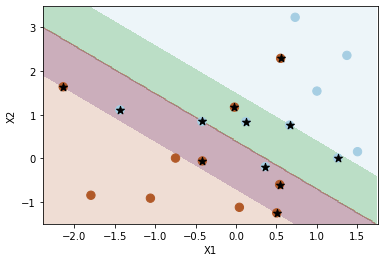

Number of support vectors:  12


In [21]:
svc2 = SVC(C=5, kernel = 'linear')
svc2.fit(X,y)
plot_svc(svc2, X, y)

In [22]:
svc2.score(X_test, y_test)

0.65

With this value of ${\tt c}$, 13 of the test observations are correctly
classified.

Now consider a situation in which the two classes are linearly separable.
Then we can find a separating hyperplane using the ${\tt svm()}$ function. First we'll give our simulated data a little nudge so that they are linearly separable:

Text(0, 0.5, 'X2')

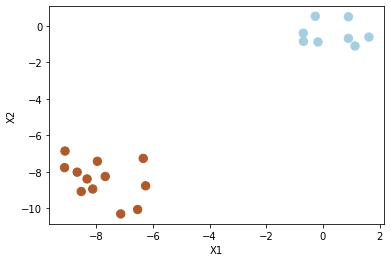

In [32]:
X_LS = X_test
y_LS = y_test
X_LS[y_LS == 1] = X_test[y_LS == 1] -1

plt.scatter(X_LS[:,0], X_LS[:,1], s=70, c=y_LS, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

Now the observations are **just barely linearly** separable. We fit the support
vector classifier and plot the resulting hyperplane, using a very large value
of ${\tt cost}$ so that no observations are misclassified. Set $\tt C = 1e5$.

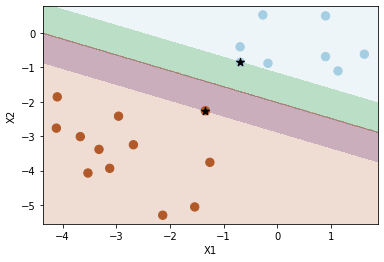

Number of support vectors:  2


In [26]:
svc3 = SVC(C=1e5, kernel = 'linear')
svc3.fit(X_LS,y_LS)
plot_svc(svc3, X_LS, y_LS)

No training errors were made and only three support vectors were used.
However, we can see from the figure that the margin is very narrow (because
the observations that are **not** support vectors, indicated as circles, are very close to the decision boundary). It seems likely that this model will perform
poorly on test data. Let's try a smaller value of ${\tt cost}$. Set $\tt C = 1$.

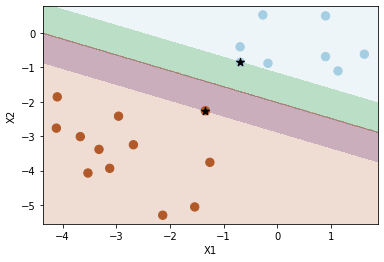

Number of support vectors:  2


In [27]:
svc4 = SVC(C=1, kernel = 'linear')
svc4.fit(X_LS,y_LS)
plot_svc(svc4, X_LS, y_LS)

Using ${\tt cost=1}$, we misclassify a training observation, but we also obtain
a much wider margin and make use of five support vectors. It seems
likely that this model will perform better on test data than the model with
${\tt cost=1e5}$.

# Support Vector Machine

In order to fit an SVM using a **non-linear kernel**, we once again use the ${\tt SVC()}$
function. However, now we use a different value of the parameter kernel.
To fit an SVM with a polynomial kernel we use ${\tt kernel="poly"}$, and
to fit an SVM with a radial kernel we use ${\tt kernel="rbf"}$. In the former
case we also use the ${\tt degree}$ argument to specify a degree for the polynomial
kernel, and in the latter case we use ${\tt gamma}$ to specify a
value of $\gamma$ for the radial basis kernel.

Let's generate some data with a non-linear class boundary:

Text(0, 0.5, 'X2')

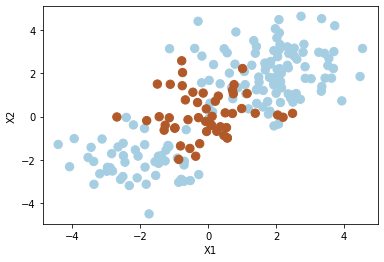

In [3]:
from sklearn.model_selection import train_test_split

np.random.seed(8)
X = np.random.randn(200,2)
X[:100] = X[:100] +2
X[101:150] = X[101:150] -2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=2)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

See how one class is kind of stuck in the middle of another class? This suggests that we might want to use a **radial kernel** in our SVM. Now let's fit
the training data using the ${\tt SVC()}$ function with a radial kernel and $\gamma = 1$:

In [8]:
svm = SVC(C=1.0, kernel='rbf', gamma=1)

In [9]:
svm.fit(X_train, y_train)

SVC(gamma=1)

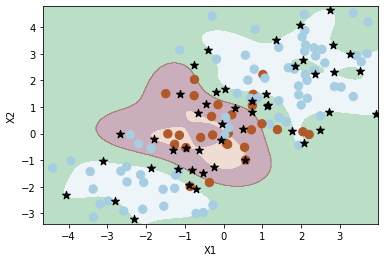

Number of support vectors:  51


In [10]:
plot_svc(svm,X_test, y_test)

Not too shabby! The plot shows that the resulting SVM has a decidedly non-linear
boundary. We can see from the figure that there are a fair number of training errors
in this SVM fit. If we increase the value of cost, we can reduce the number
of training errors:

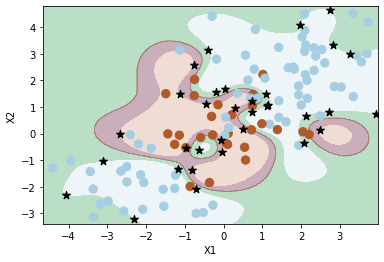

Number of support vectors:  36


In [12]:
# Increasing C parameter, allowing more flexibility
svm2 = SVC(C=100.0, kernel='rbf', gamma=1)
svm2.fit(X_train, y_train)
plot_svc(svm2,X_test, y_test)

However, this comes at the price of a more irregular decision boundary that seems to be at risk of overfitting the data. We can perform cross-validation using ${\tt GridSearchCV()}$ to select the best choice of
$\gamma$ and cost for an SVM with a radial kernel:

In [13]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'C':[0.01, 0.1, 1, 10, 100], 'gamma':[0.5,1,2,3,4]}]

clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X_train, y_train)
clf.best_params_

{'C': 10, 'gamma': 0.5}

Therefore, the best choice of parameters involves ${\tt cost=10}$ and ${\tt gamma=0.5}$. We
can plot the resulting fit using the ${\tt plot\_svc()}$ function, and view the test set predictions for this model by applying the ${\tt predict()}$
function to the test data:

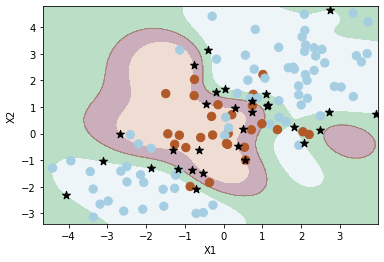

Number of support vectors:  32


In [14]:
plot_svc(clf.best_estimator_, X_test, y_test)

In [16]:
clf.best_estimator_.score(X_test, y_test)

0.87

87% of test observations are correctly classified by this SVM. Not bad!